# Preprocess B-NHL CITE-seq data

In [1]:
import cytovi
import scvi
import anndata as ad
from scipy.io import mmread
import pandas as pd
import scanpy as sc

/home/labs/amit/floriani/mambaforge/envs/cytovi/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_use_gpu' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
# read data
data_path = '../data/raw/CITE_seq/BNHL/'
rna = mmread(data_path + 'BNHL_seurat_combined_counts.mtx').tocsr()
adt = mmread(data_path + 'BNHL_seurat_combined_ADT_counts.mtx').tocsr()
obs = pd.read_csv(data_path + 'BNHL_seurat_combined_metadata.csv', index_col=0)
var_names = pd.read_csv(data_path + 'BNHL_seurat_combined_gene_names.csv', index_col=1).index
adt_names = pd.read_csv(data_path + 'BNHL_seurat_combined_ADT_names.csv', index_col=1).index
adt_names= adt_names.str.removeprefix('.')

/tmp/ipykernel_12848/2369796182.py:5: DtypeWarning: Columns (15,16,17,21,22,23,24,28,29,30,32,34,36,37,38,40,70,72,74,77,78,81,84,85,88,90,108) have mixed types. Specify dtype option on import or set low_memory=False.
  obs = pd.read_csv(data_path + 'BNHL_seurat_combined_metadata.csv', index_col=0)


In [3]:
# create anndata
adata = ad.AnnData(X=rna.T, obs=obs, var=pd.DataFrame(index=var_names))

In [16]:
# quick check of the data
adata.layers['counts'] = adata.X.copy()
adata.raw = adata.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X.copy()
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

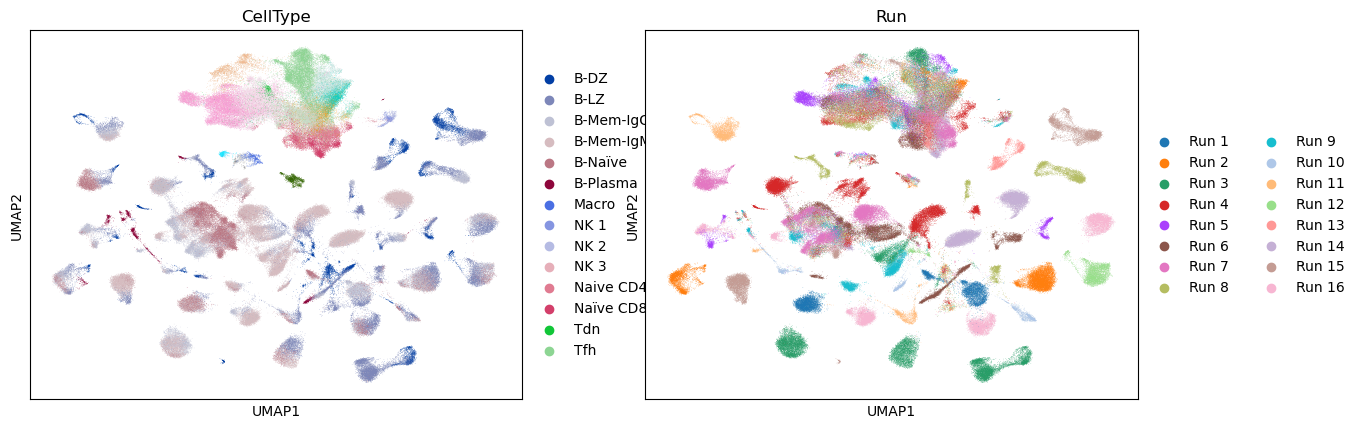

In [17]:
sc.pl.umap(adata, color=['CellType', 'Run'])

In [18]:
adata

AnnData object with n_obs × n_vars = 230637 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.D

# look at protein

In [19]:
# create anndata
adata_prot = ad.AnnData(X=adt.T.todense(), obs=obs, var=pd.DataFrame(index=adt_names))

/home/labs/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/anndata/_core/storage.py:85: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [20]:
adata_prot.layers['raw'] = adata_prot.X.copy()
cytovi.pp.arcsinh(adata_prot, global_scaling_factor=5)
cytovi.pp.scale(adata_prot)
sc.pp.pca(adata_prot)
sc.pp.neighbors(adata_prot)
sc.tl.umap(adata_prot)

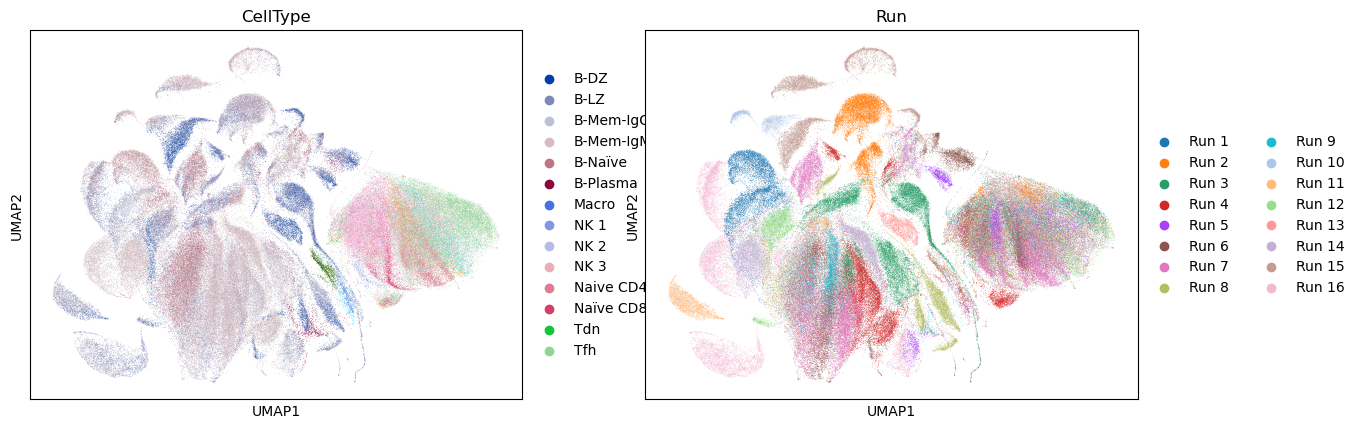

In [21]:
sc.pl.umap(adata_prot, color=['CellType', 'Run'])

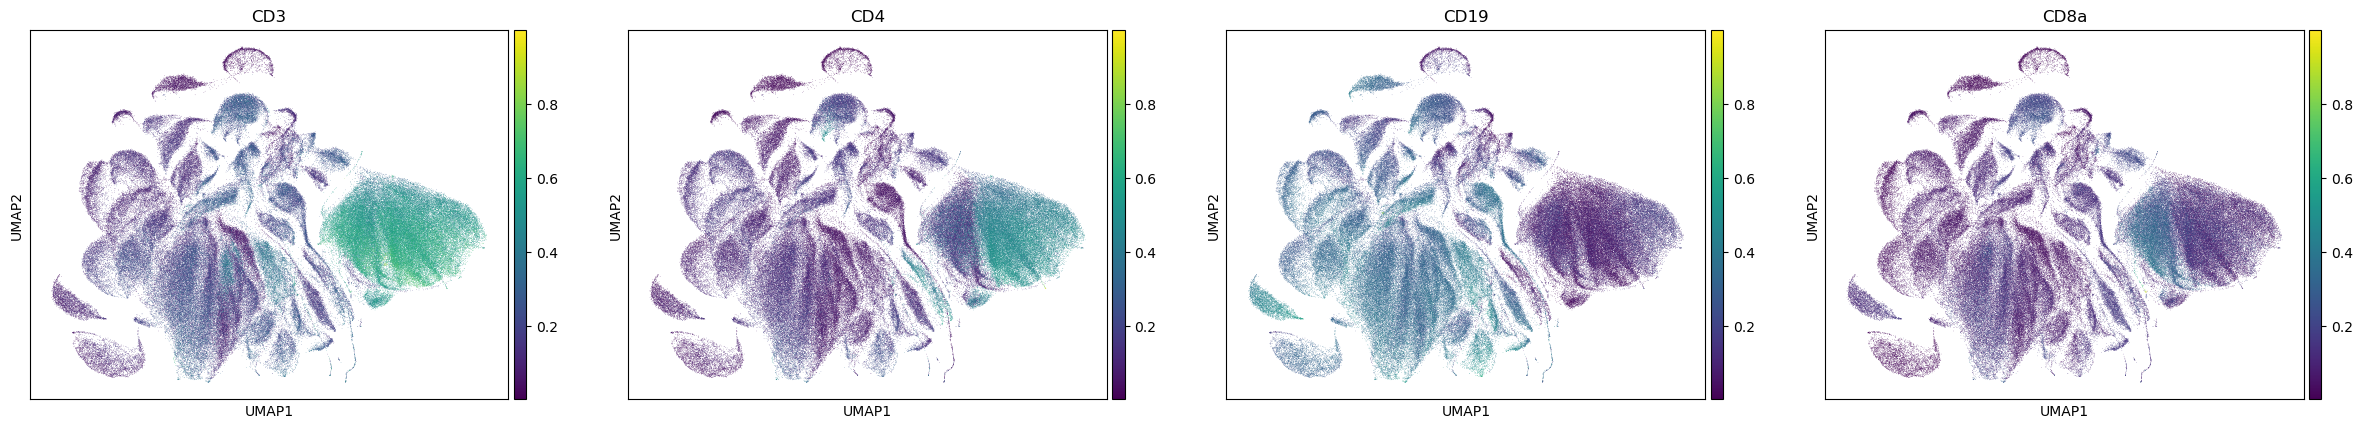

In [22]:
sc.pl.umap(adata_prot, color=['CD3', 'CD4', 'CD19', 'CD8a'], layer='scaled')

# export h5ad files

In [24]:
adata_prot

AnnData object with n_obs × n_vars = 230637 × 70
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNs

In [25]:
# subset on T cells
tcell_names = ['Treg CM2', 'Ttox EM1', 'Ttox EM3', 'Tpr', 'Treg EM1', 'Treg CM1', 'Th CM1', 'Tdn', 'Tfh', 'Th CM2', 'Naive CD4 T', 'Ttox EM2', 'Naïve CD8 T', 'Treg EM2']

adata_tcell = adata[adata.obs['CellType'].isin(tcell_names)].copy()
adata_prot_tcell = adata_prot[adata_prot.obs['CellType'].isin(tcell_names)].copy()

In [26]:
adata_tcell

AnnData object with n_obs × n_vars = 72721 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DW

In [ ]:
# preprocess and rename T cell data
cytovi.pp.arcsinh(adata_prot_tcell, global_scaling_factor=5)
cytovi.pp.scale(adata_prot_tcell, batch_key = 'Run')
adata_prot_tcell.var.rename(index={'CD279': 'PD1', 'CD185': 'CXCR5', 'CD278': 'ICOS', 'CD8a': 'CD8'}, inplace = True)

In [38]:
# delete columns that interfere with saving
del adata.obs['old.ident']
del adata_tcell.obs['old.ident']
del adata_prot.obs['old.ident']
del adata_prot_tcell.obs['old.ident']

In [39]:
# save h5ad to disk
adata.write(f'{data_path}2024-11-06_BNHL_CITEseq_combined_RNA.h5ad')
adata_prot.write(f'{data_path}2024-11-06_BNHL_CITEseq_combined_protein.h5ad')

adata_tcell.write(f'{data_path}2024-11-06_BNHL_CITEseq_Tcells_RNA.h5ad')
adata_prot_tcell.write(f'{data_path}2024-11-06_BNHL_CITEseq_Tcells_protein.h5ad')